### 2021 Spring "EE479: Scientific Computing & Data"

#### Tae Hyung Kim, Yumin Song (KAIST EE Yong-Hoon Kim Group) 
#### Kutz 2.3 Gradient (Steepest) Descent for Ax=b

#### 2021. 05. 01 Revised from matlab version 

### Gradient (Steepest) Descent for Ax = b

To begin, we will consider the concept of the quadratic form

$ f(x) = \frac{1}{2}x^TAx - b^Tx + c $

where A is a matrix, b and x are vectors, and c is a scalar constant.

The gradient of the quadratic form is defined as

$\triangledown f(x)=$ $\left[\begin{array}{rrr} 
\frac{\partial}{\partial{x_1}}f(x)\\
\frac{\partial}{\partial{x_2}}f(x)\\
\vdots \quad \\
\frac{\partial}{\partial{x_n}}f(x)\\
\end{array}\right]$

Therefore, the gradient of the function $f(x)$ can be computed to be

$\triangledown f(x)=\frac{1}{2}A^{T}x+\frac{1}{2}Ax-b$

If the matrix $A$ is symmetric, then $A^{T} = A$ and the gradient has a critical point $\triangledown f(x)=Ax-b=0$

If $A$ is not symmetric, then the gradient descent algorithm finds the solution to the linear system $\frac{1}{2}(A^{T}+A)x=b$

Therefore, we can change the $Ax = b$ problem to the critical point finding problem



### Find critical point & algorithm

The $\triangledown f(x)$ gives the steepest descent towrads the minimum point of $f(x)$, i.e. the minmum is located in the direction given by $-\triangledown f(x)$.

Then, pick the next point uisng calculated gradient by defining following equation 

$$ \xi(\tau) = x-\tau\triangledown f(x) $$

This requires the determination of the correct value of $ \tau $ in the algorithm.

To compute the value of $ \tau $ , consider the construction of a new function

$$ F(\tau) = f( \xi(\tau) )  $$
$$ \frac{\partial{F}}{\partial{\tau}} = -\triangledown f(\xi)\triangledown f(x) = 0  $$

which must be minimized now as a function of $\tau$ . This is accomplished by computing $dF/dτ = 0$.

Algorithm:

1 Guess initial values: $(x_{1}, y_{1})$.

2 Find optimal $ \tau $

3 Find next step $ x_{k+1} = x_{k}-\tau\triangledown f(x_{k}) $, $ y_{k+1} = y_{k}-\tau\triangledown f(y_{k}) $

4 Check for convergence: $ \vert f(x_{k+1},y_{k+1}) − f(x_{k},y_{k}) \vert $ < tolerance.

### Example
Consider the following illustrative example system that is both positive definite and symmetric 

$A = $ $\left[\begin{array}{rrr} 
3&2\\
2&6\\
\end{array}\right]$, 
$b = $ $\left[\begin{array}{rrr} 
2\\
-8\\
\end{array}\right]$, $c =0$ 

First, we calculate the quadratic form for this case with gradient 

$\triangledown f(x)=$ $\left[\begin{array}{rrr} 
3x_1+2x_2-2\\
2x_1+6x_2+8\\
\end{array}\right]$

Let's solve $Ax = b$ problem using python code

Optimization terminated successfully.
         Current function value: -8.596457
         Iterations: 11
         Function evaluations: 22
optimized tau iteration = 0
Optimization terminated successfully.
         Current function value: -9.740788
         Iterations: 14
         Function evaluations: 28
optimized tau iteration = 1
Optimization terminated successfully.
         Current function value: -9.952107
         Iterations: 11
         Function evaluations: 22
optimized tau iteration = 2
Optimization terminated successfully.
         Current function value: -9.991134
         Iterations: 14
         Function evaluations: 28
optimized tau iteration = 3
Optimization terminated successfully.
         Current function value: -9.998359
         Iterations: 11
         Function evaluations: 22
optimized tau iteration = 4
Optimization terminated successfully.
         Current function value: -9.999697
         Iterations: 14
         Function evaluations: 28
optimized tau iteration = 

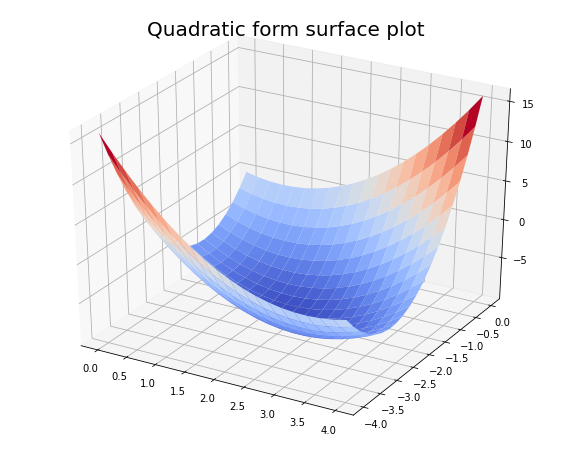

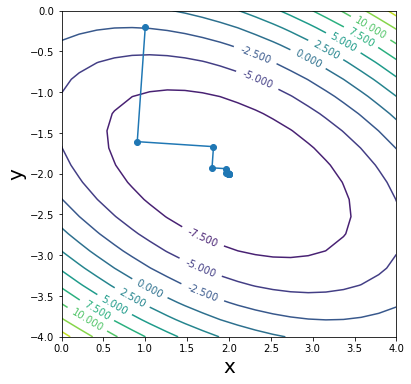

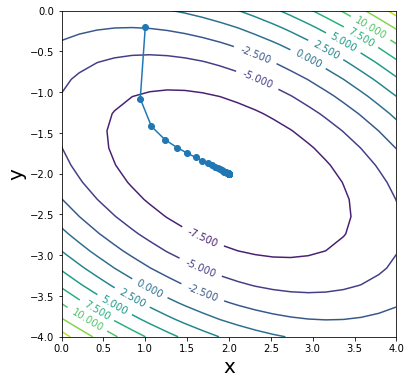

In [137]:
import numpy as np
from scipy import optimize 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from matplotlib import cm

A = np.matrix([[3.0, 2.0], [2.0, 6.0]]) # A matrix
b = np.matrix([[2.0], [-8.0]])  # b vector
c = 0.0

def f(x, A, b, c):              # Object function
    return float(0.5 * x.T * A * x - b.T * x + c)

def bowl(A, b, c):              # Bowl shape (positive definite, A^Tx > 0)
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(0, 4, size))
    x2 = list(np.linspace(-4, 0, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    plt.title('Quadratic form surface plot',fontsize=20)
    #fig.show()
    return x1, x2, zs

def contoursteps(x1, x2, zs, text,steps=None,):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
        plt.xlabel('x',fontsize=20)
        plt.ylabel('y',fontsize=20)
   # fig.show()

x1, x2, zs = bowl(A, b, c)           #plot object function in 3d


n=128
x= np.zeros(n)
x[0] = 1                  #initial x
y= np.zeros(n)
y[0] = -0.2            #initial y
f = np.zeros(60)
f[0] = 0.5*(A[0,0]*x[0]**2 + (A[1,0]+A[0,1])*x[0]*y[0]+A[1,1]*y[0]**2) + b[0,0]*x[0]+b[1,0]*y[0]
steps = [(x[0], y[0])]

def tausearch(tau,x,y):
    x0 = x - tau*(A[0,0]*x+A[0,1]*y-b[0,0])
    y0 = y - tau*(A[1,0]*x+A[1,1]*y-b[1,0])
    mintau = 0.5*(A[0,0]*x0**2 + (A[1,0]+A[0,1])*x0*y0+A[1,1]*y0**2) - b[0,0]*x0 -b[1,0]*y0
 #   mintau = 1.5*x0**2 +2*x0*y0 +3*y0**2 -2*x0 +8*y0
   # 1.5*x0**2 +2*x0*y0 +3*y0**2 -2*x0 +8*y0
    return mintau

def gradient_decent(A,b,f,x_0,y_0):
    steps=[]
    steps.append((x_0,y_0))
    counter = 0
    for j in range(50):
        tau = optimize.fmin(tausearch,(0.2),(x[j],y[j]))  #find tau to minimize F function
        x[j+1]= x[j] - tau*(A[0,0]*x[j]+A[0,1]*y[j]-b[0,0])             #x_{n+1} = x_{n} - tau*delf(x_{n})
        y[j+1]= y[j] - tau*(A[1,0]*x[j]+A[1,1]*y[j]-b[1,0])
        f[j+1] = 0.5*(A[0,0]*x[j+1]**2 + (A[1,0]+A[0,1])*x[j+1]*y[j+1]+A[1,1]*y[j+1]**2) - b[0,0]*x[j+1] -b[1,0]*y[j+1]
        print ('optimized tau iteration = %i' %counter)
        counter = counter + 1
        steps.append((x[j+1],y[j+1]))
        if abs(f[j+1]-f[j]) < 10**(-6):
            break
    return steps

def gradient_decent_fixed_tau(A,b,f,x_0,y_0,tau):
    steps=[]
    steps.append((x_0,y_0))
    counter = 0
    for j in range(50):
     #   tau = 0.1
        x[j+1]= x[j] - tau*(A[0,0]*x[j]+A[0,1]*y[j]-b[0,0])             #x_{n+1} = x_{n} - tau*delf(x_{n})
        y[j+1]= y[j] - tau*(A[1,0]*x[j]+A[1,1]*y[j]-b[1,0])
        f[j+1] = 0.5*(A[0,0]*x[j+1]**2 + (A[1,0]+A[0,1])*x[j+1]*y[j+1]+A[1,1]*y[j+1]**2) + b[0,0]*x[j+1]+b[1,0]*y[j+1]
        steps.append((x[j+1],y[j+1]))
       # print ('fixed tau iteration = %i' %counter)
        counter = counter + 1
        if abs(f[j+1]-f[j]) < 10**(-6):
            break
    return steps

steps = gradient_decent(A,b,f,x[0],y[0])
contoursteps(x1, x2, zs, float(0.2),steps)

steps = gradient_decent_fixed_tau(A,b,f,x[0],y[0],0.1)
contoursteps(x1, x2, zs, float(0.2),steps)


In first example, we use scipy optimize code for search optimal $\tau$ with initial value 0.2. 
Using optimal $\tau$.  value, each successive gradient in the steepest descent algorithm is orthogonal to the previous step. 
we can see the value finding using downhill property of gradient descent in the plot. 
On the other hand, fixed $\tau$ with 0.1 is used in seceond example. It can also find final value, but much slow in this case since the descent steps are not chosen in an optimal way. The reason is that the optimized $ \tau $ constrains each $ \tau $ size and orthogonality during finding a solution in first example but not in second example.

### Well conditioned A matrix example

In the $Ax = b$  to the critical point finding problem,the concept of well-conditioned and ill-conditioned matrices shows how well the $ Ax=b $ problem is solved.

Condition number defined 

$ cond(A) = \vert\vert A \vert\vert \cdot \vert\vert A^{-1} \vert\vert $

If the condition number is close to $1$, we define well-conditioned. If the condition number is very large number, we define ill-conditioned.  

Consider the following illustrative example system with well conditioned that is both positive definite and symmetric 

$A = $ $\left[\begin{array}{rrr} 
3&0.5\\
0.5&3\\
\end{array}\right]$, 
$b = $ $\left[\begin{array}{rrr} 
2\\
-2\\
\end{array}\right]$, $c =0$ 

First, we calculate the quadratic form for this case with gradient 

$\triangledown f(x)=$ $\left[\begin{array}{rrr} 
3x_1+0.5x_2-2\\
0.5x_1+3x_2+2\\
\end{array}\right]$
with initial value
$x = $ $\left[\begin{array}{rrr} 
1\\
-1\\
\end{array}\right]$

Optimization terminated successfully.
         Current function value: -1.494090
         Iterations: 13
         Function evaluations: 26
optimized tau iteration = 0
Optimization terminated successfully.
         Current function value: -1.597799
         Iterations: 14
         Function evaluations: 28
optimized tau iteration = 1
Optimization terminated successfully.
         Current function value: -1.599954
         Iterations: 13
         Function evaluations: 26
optimized tau iteration = 2
Optimization terminated successfully.
         Current function value: -1.599999
         Iterations: 14
         Function evaluations: 28
optimized tau iteration = 3
Optimization terminated successfully.
         Current function value: -1.600000
         Iterations: 13
         Function evaluations: 26
optimized tau iteration = 4


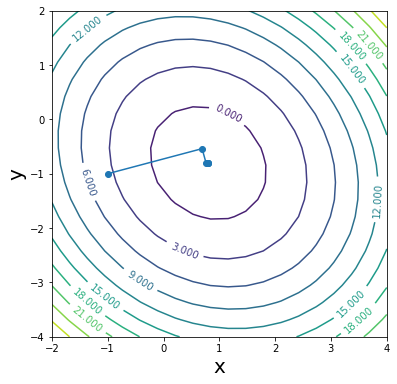

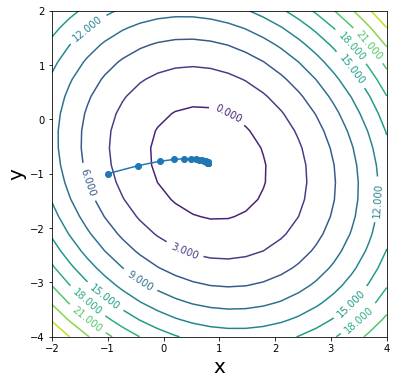

In [138]:
A = np.matrix([[3.0, 0.5], [0.5, 3.0]]) # A matrix
b = np.matrix([[2.0], [-2.0]])  # b vector
c = 0.0
def f(x, A, b, c):              # Object function
    return float(0.5 * x.T * A * x - b.T * x + c)
size = 20
x1 = list(np.linspace(-2, 4, size))
x2 = list(np.linspace(-4, 2, size))
x1, x2 = np.meshgrid(x1, x2)
zs = np.zeros((size, size))
for i in range(size):
     for j in range(size):
        x = np.matrix([[x1[i,j]], [x2[i,j]]])
        zs[i,j] = f(x, A, b, c)

x= np.zeros(n)
x[0] = -1        #initial x
y= np.zeros(n)
y[0] = -1           #initial y
f = np.zeros(60)
f[0] = 0.5*(A[0,0]*x[0]**2 + (A[1,0]+A[0,1])*x[0]*y[0]+A[1,1]*y[0]**2) + b[0,0]*x[0]+b[1,0]*y[0]
steps = [(x[0], y[0])]

steps = gradient_decent(A,b,f,x[0],y[0])
contoursteps(x1, x2, zs, float(0.2),steps)

steps = gradient_decent_fixed_tau(A,b,f,x[0],y[0],0.1)
contoursteps(x1, x2, zs, float(0.2),steps)

In [130]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]]) # A matrix
print('condition number in first example', np.linalg.cond(A)  )
A = np.matrix([[3, 0.5], [0.5, 3]] ) # A matrix
print('condition number in seceond example', np.linalg.cond(A)  )

condition number in first example 3.499999999999999
condition number in seceond example 1.3999999999999997


We can find condition number using numpy.linalg.cond(A)
In first example condition number is 3.5 and second example shows 1.4
Therefore, second example is well-conditioned matrix compared to first example

In well-condioned A matrix example, gradient decent need only 4 iteration step for finding mininum point but in ill-conditioned A matrix example need 11 iteration step.

In this example, we can see how important it is to handle matrices well.
